In [12]:
import sys
from pathlib import Path

# 添加 src 目录到 Python 模块搜索路径
sys.path.append(str(Path().resolve().parent))

from pathlib import Path
import pickle as pkl
from typing import Literal

import matplotlib.pylab as plt
from matplotlib.axes._axes import Axes

from HexLattice import (
    HexCell,
    HexLattice,
    AxialCoordinate,
    DoubleWidthCoordinate,
    PlotConfig,
)

## Read data from pkl

In [13]:
result_path = Path("mega_power_diff.pkl")
with open(result_path, "rb") as f:
    diff = pkl.load(f)

## Generate Megapower HexLattice

In [14]:
X_MAX = 46


def snake_coord(
    start: DoubleWidthCoordinate, first_dirction: Literal["bottom-right", "right"]
) -> list[AxialCoordinate]:
    res_list = list()
    next_coord = start
    next_dirction: Literal["bottom-right", "right"] = first_dirction

    while next_coord.x <= X_MAX:
        res_list.append(next_coord)

        # get next coord
        last_coord = next_coord
        next_coord = last_coord.get_new_by_moving(next_dirction, 1)

        # get next direction
        last_dirction = next_dirction
        next_dirction = "bottom-right" if last_dirction == "right" else "right"

    return res_list

In [15]:
megapower_list = list()
bottom_right = [
    DoubleWidthCoordinate(0, 2),
    DoubleWidthCoordinate(0, 0),
    DoubleWidthCoordinate(0, -2),
]
right = [DoubleWidthCoordinate(1 + 3 * i, -3 - i) for i in range(16)]

for br in bottom_right:
    megapower_list.extend(snake_coord(br, "bottom-right"))
for r in right:
    megapower_list.extend(snake_coord(r, "right"))

In [16]:
hl = HexLattice([HexCell(c) for c in megapower_list])
for hex_cell in hl.HexCells:
    hex_cell.text = f"({hex_cell.double_width.x},{hex_cell.double_width.z})"

## Write data into HexCells

In [17]:
hl_pod = HexLattice(
    sorted(hl.HexCells, key=lambda x: (x.double_width.x, x.double_width.z)), pitch=1.6
)
for i, hex_cell in enumerate(hl_pod.HexCells):
    hex_cell.value = diff["pod"][i] * 100

In [18]:
hl_lin = HexLattice(
    sorted(hl.HexCells, key=lambda x: (x.double_width.x, x.double_width.z)), pitch=1.6
)
for i, hex_cell in enumerate(hl_lin.HexCells):
    hex_cell.value = diff["lin"][i] * 100

## Plot

In [19]:
pc = PlotConfig("Relative Error of POD-RBF Power Prediction")
pc.image_root_dir = Path("plot")
pc.text_size = 7
pc.image_type = "png"
pc.plot_style = "bmh"

<>:10: SyntaxWarning: invalid escape sequence '\%'
<>:10: SyntaxWarning: invalid escape sequence '\%'
C:\Users\61012\AppData\Local\Temp\ipykernel_43548\3344011546.py:10: SyntaxWarning: invalid escape sequence '\%'
  cbar.set_ticklabels([f"{t}\%" for t in c_ticks])
C:\Users\61012\AppData\Local\Temp\ipykernel_43548\3344011546.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([f"{t}\%" for t in c_ticks])


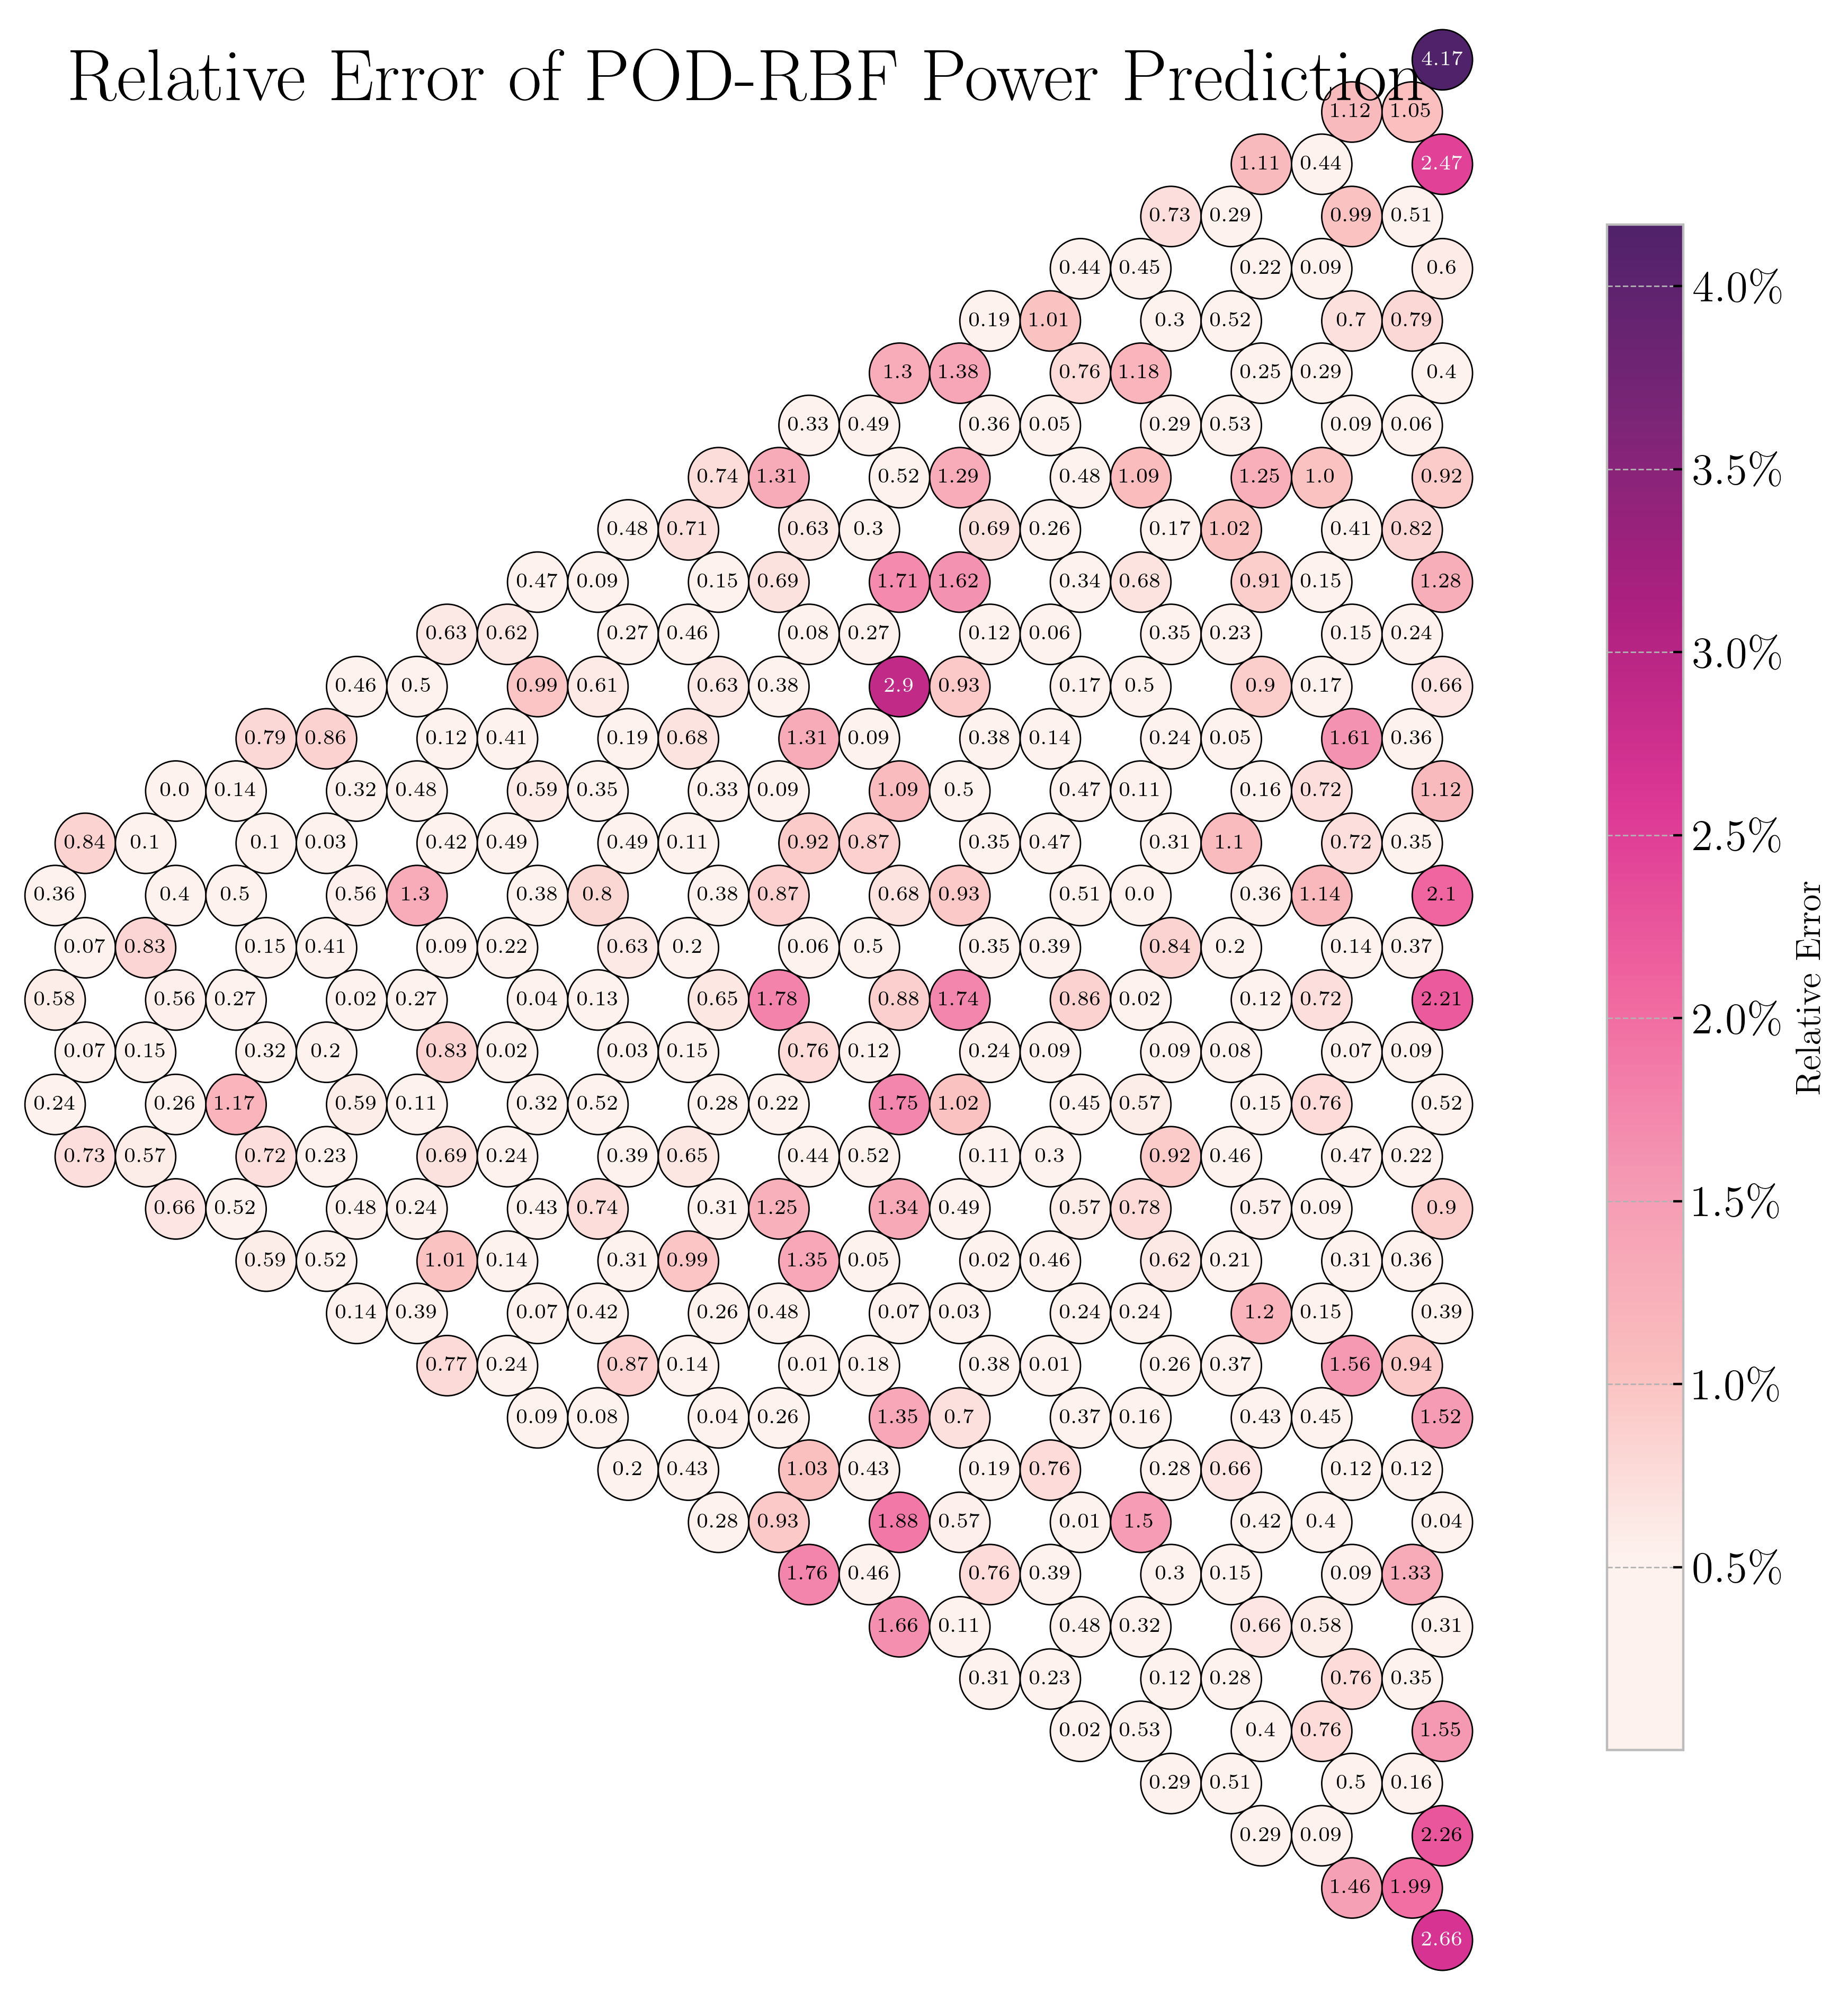

In [20]:
fig = plt.figure(figsize=(12, 12))
axes: Axes = fig.subplots()
hl_pod.plot_circle(pc, axes, "value")

cb_ax = fig.add_axes([0.85, 0.2, 0.03, 0.6])
cbar = fig.colorbar(hl_pod.mappable(pc), cb_ax)
cbar.ax.tick_params(labelsize=15)
cbar.set_label("Relative Error")
c_ticks = cbar.get_ticks()
cbar.set_ticklabels([f"{t}\%" for t in c_ticks])

plt.savefig(pc.image_path)
plt.show()
plt.close()

In [21]:
pc = PlotConfig("Relative Error of Linear Interpolation Power Prediction")
pc.image_root_dir = Path("plot")
pc.text_size = 7
pc.image_type = "png"
pc.plot_style = "bmh"

<>:10: SyntaxWarning: invalid escape sequence '\%'
<>:10: SyntaxWarning: invalid escape sequence '\%'
C:\Users\61012\AppData\Local\Temp\ipykernel_43548\2820084870.py:10: SyntaxWarning: invalid escape sequence '\%'
  cbar.set_ticklabels([f"{t}\%" for t in c_ticks])
C:\Users\61012\AppData\Local\Temp\ipykernel_43548\2820084870.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([f"{t}\%" for t in c_ticks])


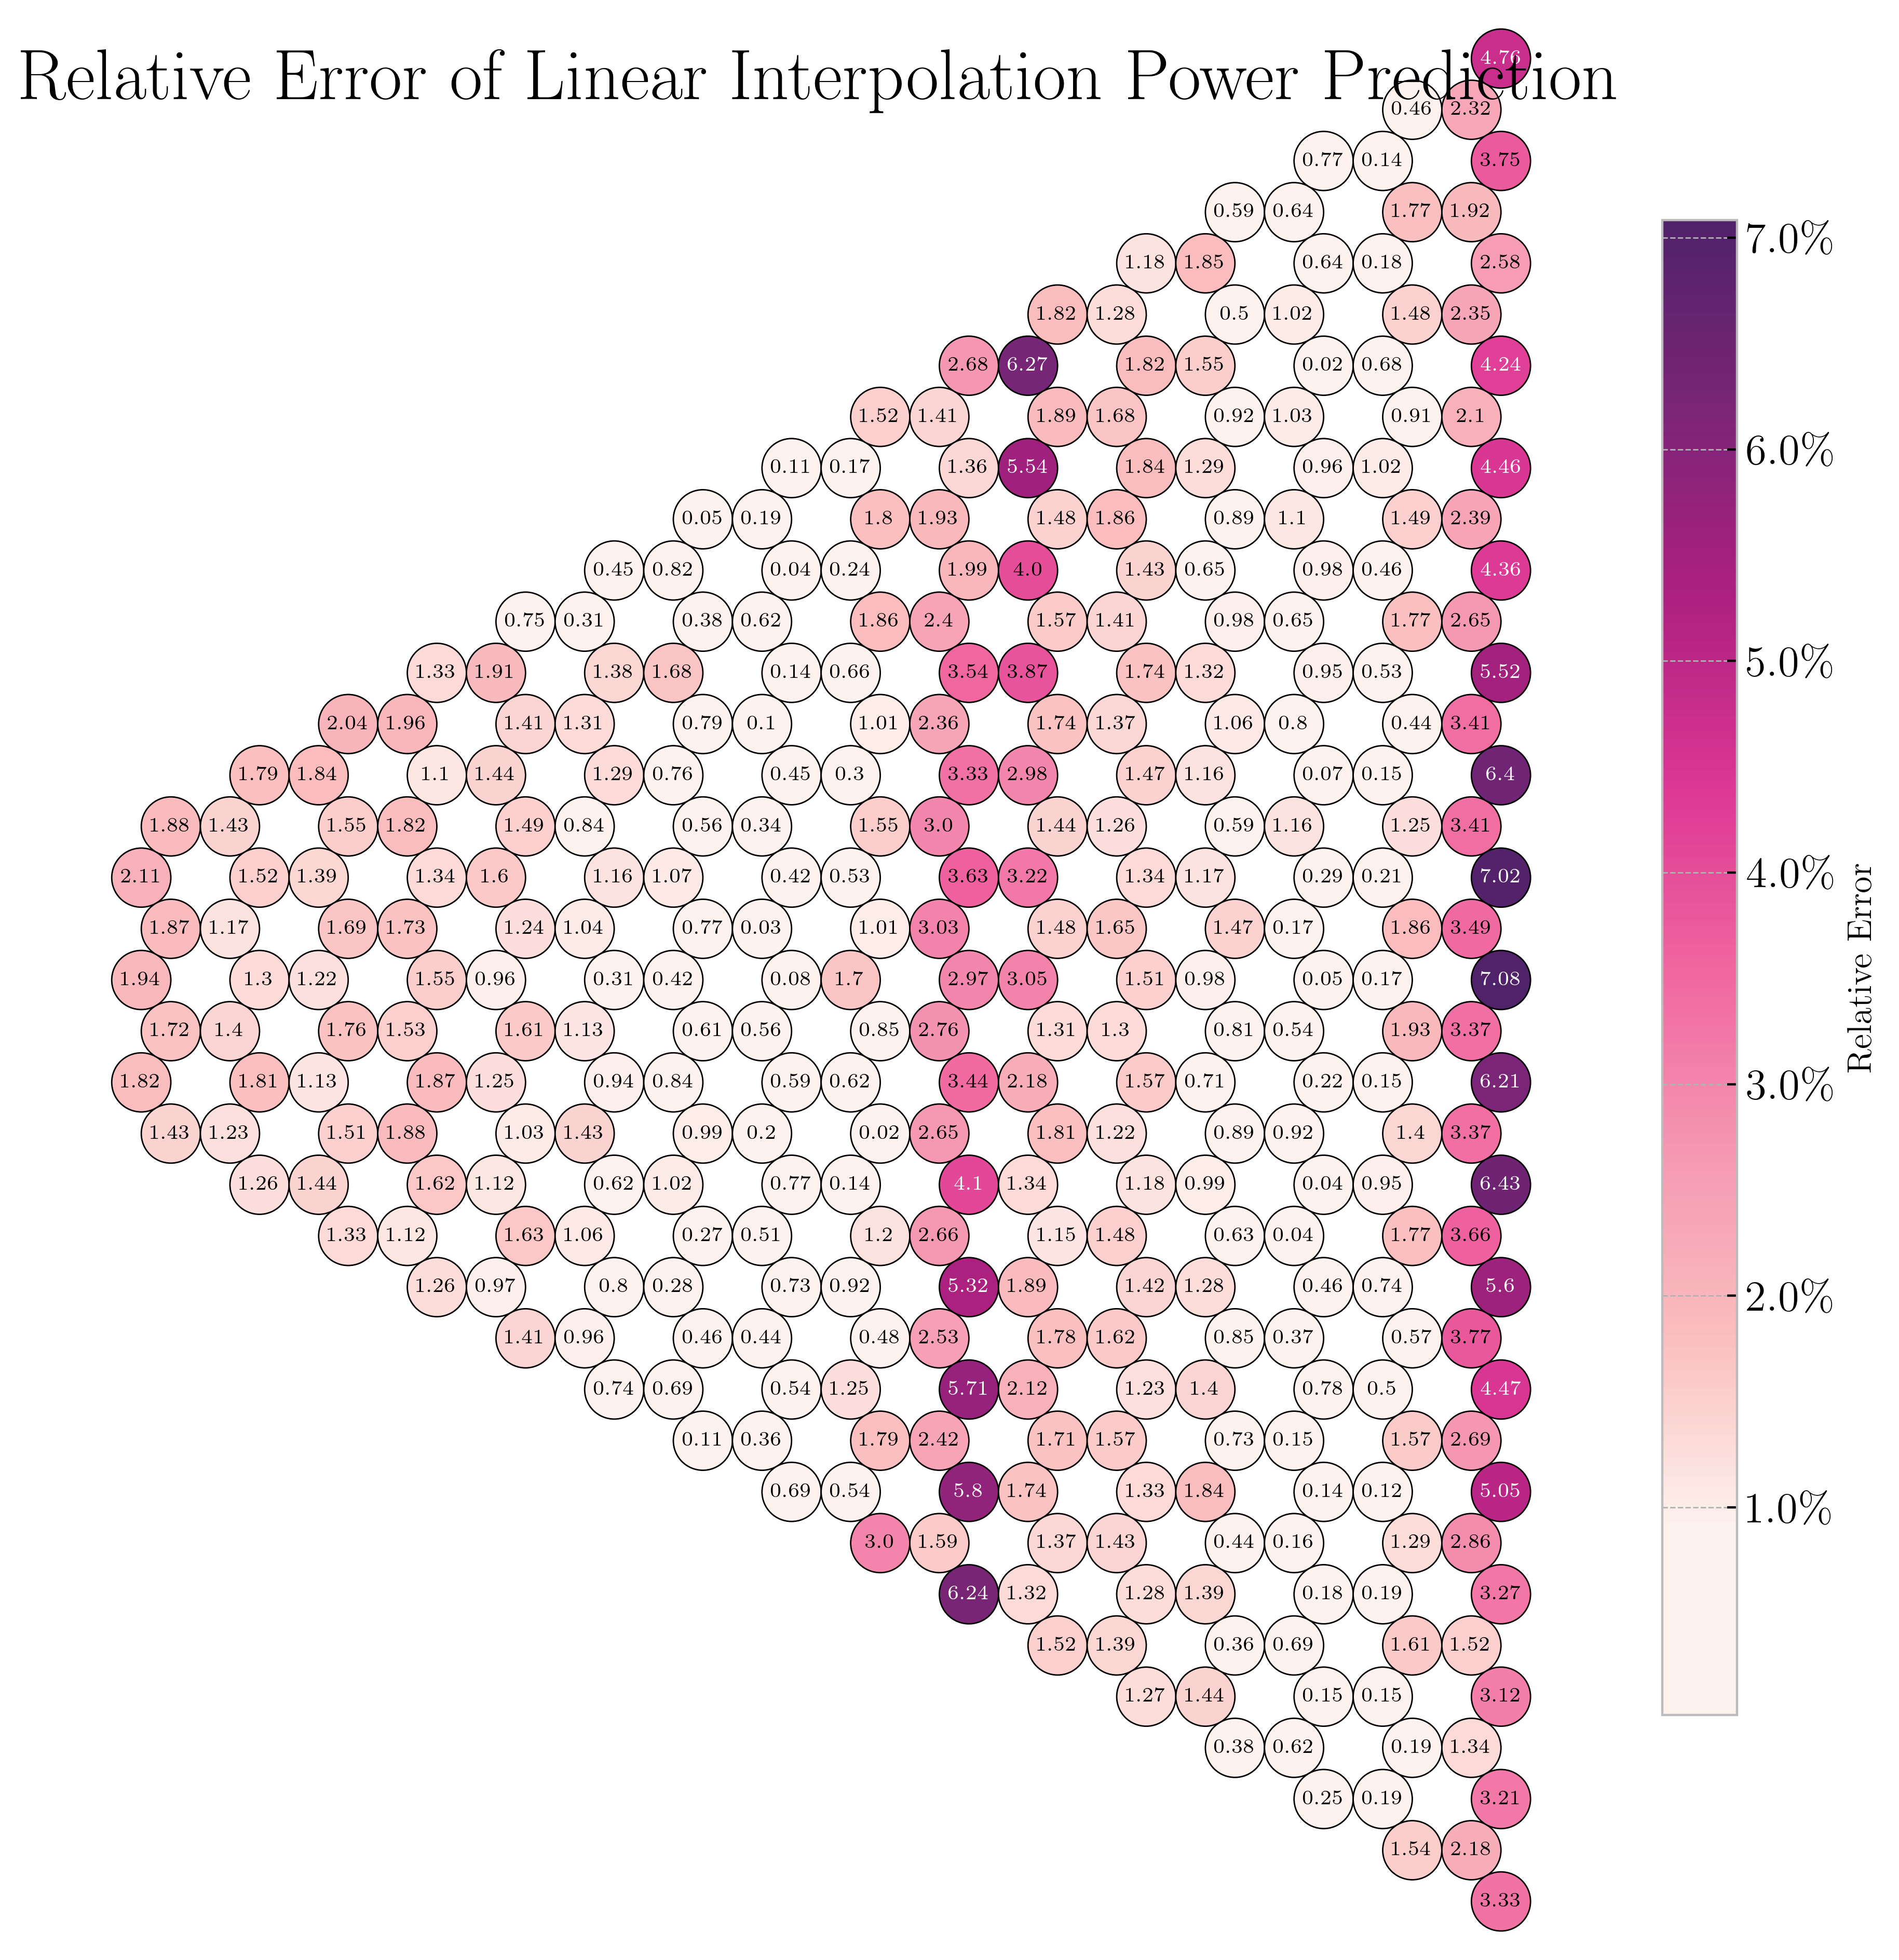

In [22]:
fig = plt.figure(figsize=(12, 12))
axes: Axes = fig.subplots()
hl_lin.plot_circle(pc, axes, "value")

cb_ax = fig.add_axes([0.85, 0.2, 0.03, 0.6])
cbar = fig.colorbar(hl_lin.mappable(pc), cb_ax)
cbar.ax.tick_params(labelsize=15)
cbar.set_label("Relative Error")
c_ticks = cbar.get_ticks()
cbar.set_ticklabels([f"{t}\%" for t in c_ticks])

plt.savefig(pc.image_path)
plt.show()
plt.close()